<h1>Support Vector Machine (SVM) </h1>

Support Vector Machine (SVM) is a supervised classifier method, where a "machine" is taught to associate <i>training data</i>, which are subsets of a main data set, with certain targets. This trained machine can then be used to classify the main data set. 

Imagine you have two flocks of sheep, black and white. You want to build a fence that is an optimal straight line between them. So you pick out some black and some white sheep and use their positions to determine the best fence position and orientation. When you build the fence, hopefully it will separate the two flocks completely!

What if you have three flocks, A, B and C? Then you need to determine the fences of A vs (B,C), B vs (A,C), and C vs (A,B).

<hr>

<h2>SVM using Python <code>scikit-learn</code> or <code>sklearn</code></h2>

This is a program to illustrate how Python can be used for machine learning. 

<code>sklearn</code> is a Python library which can implement machine learning. There are others such as the more famous <code>tensorflow</code> and <code>keras</code>.

Importing the <code>Numpy</code> and <code>Matplotlib</code> python libraries to handle arrays and display figures. We will import the <code>sklearn</code> library later.

Press <code>Shift-Enter</code>



In [1]:
import numpy as np
import matplotlib.pyplot as plt

<h4> Loading the image you want to work with and display it.</h4>

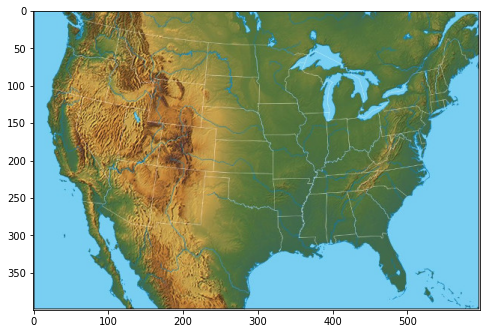

In [2]:
img = plt.imread('usa.jpg')
plt.figure(figsize = [8,8])
plt.imshow(img)
plt.show()

Selecting some areas of the map for training data: highlands, plains and water. Then display

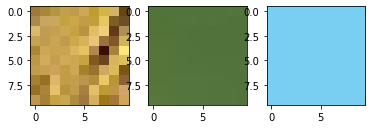

In [3]:
sub =[img[150:160,70:80],img[150:160,330:340],img[350:360,10:20] ]

for i in range(3):
    plt.subplot(130+i+1)
    plt.imshow(sub[i])
plt.show()

Rearranging the arrays into 300 rows, 3 RGB columns because I couldn't figure out how to make Support vector machine work directly on 2D RGB. This is the array of training data 

Also, create an array of targets. The brown highlands are assigned "1", the green plains are assigned "2", blue water is assigned "3". When we train the Support Vector Machine, we teach it to associate pixels of certain colour to a target number.

Target names are kind of optional, but nice to have. 

In [4]:
data = []
target = []
for i in range(3):
    for j in range(10):
        for k in range(10):
            data += [sub[i][j][k]]
            target += [i]

target_names = ['highland', 'plains', 'water']



Importing the libraries for Support Vector Machine, and create a "mesin" as an instance of class SVC(). This is the support vector machine we will use.

In [5]:
from sklearn.svm import SVC
mesin = SVC()

The actual Support Vector Machine learning! It is one line, using the data array and the target array to train the support vector machine. Remember the "data" are just small subsections of the original image.

In [6]:
mesin.fit(data, target)


SVC()

Use the trained machine to <i>predict</i> what each pixel in the image belongs to. 

In [8]:
ROW,COL,RGB = np.shape(img)
gambar = img.reshape(ROW*COL, RGB)

kelas = mesin.predict(gambar)

In [9]:
kelas = kelas.reshape(ROW,COL)


Create 3 empty arrays. The different regions of the orignal image wil be given to different arrays depending on the classification.

In [10]:
output = np.zeros((3, ROW, COL, RGB))

for i in range(ROW):
    for j in range(COL):
        output[kelas[i][j]][i][j] = img[i][j]
            

Convert the datatype to uint8 because the function <i>imshow</i> will work properly only with floating point between 0 and 1, or uint8 integer between 0 and 255.

In [11]:
output = output.astype(np.uint8)


Show the original map and the three regions that have been classified as separate images 

In [12]:
%matplotlib qt
plt.figure(figsize = (10,10))
plt.subplot(221).set_title('original map')
plt.imshow(img)

for i in range(3):
    plt.subplot(220 + i +2).set_title(target_names[i])
    plt.imshow(output[i])
plt.show()